In [ ]:
# Cálculo de Métricas de Evaluación para Clasificación:

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)

Exactitud: 0.975
Precisión: 0.9754780751086168
Recuperación o sensibilidad (recall): 0.975
Puntuación o medida F1 (F1-score): 0.9751092427666409


In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Datos de ejemplo (clasificación binaria)
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

# Calculando la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Extrayendo los valores de la matriz de confusión
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculando las métricas de evaluación
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Mostrando la matriz de confusión y las métricas de evaluación
print("Matriz de Confusión:")
print(conf_matrix)
print("\nMétricas de Evaluación:")
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o Sensibilidad (recall):", recall)
print("Puntuación F1:", f1)


Matriz de Confusión:
[[2 3]
 [1 4]]

Métricas de Evaluación:
Exactitud: 0.6
Precisión: 0.5714285714285714
Recuperación o Sensibilidad (recall): 0.8
Puntuación F1: 0.6666666666666666


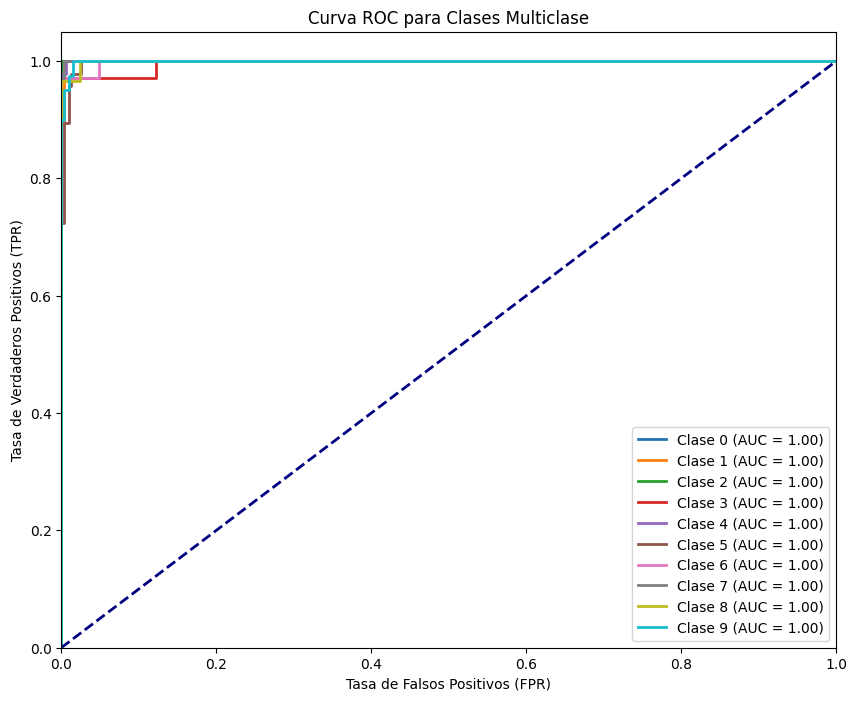

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Clase %d (AUC = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para Clases Multiclase')
plt.legend(loc="lower right")
plt.show()
